In [26]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

In [3]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=categories)

In [7]:
X_train = newsgroups_train.data
y_train = newsgroups_train.target
X_test = newsgroups_test.data
y_test = newsgroups_test.target

In [8]:
reg_token = RegexpTokenizer("[\w']{3,}")

In [9]:
def tokenizer(text):
    tokens = reg_token.tokenize(text.lower())
    features = list(map(lambda token: WordNetLemmatizer().lemmatize(token), tokens))
    return features

In [10]:
tfidf = TfidfVectorizer(tokenizer=tokenizer)
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
lr_clf = LogisticRegression(C=10, max_iter=1000)
lr_clf.fit(X_train_tf, y_train)
print(lr_clf.score(X_train_tf, y_train), lr_clf.score(X_test_tf, y_test), X_train_tf.shape)

0.9783677482792527 0.7730968218773097 (2034, 24848)


In [16]:
pca = PCA(n_components=2000, random_state=7)
X_train_pca = pca.fit_transform(X_train_tf.toarray())
X_test_pca = pca.transform(X_test_tf.toarray())
print(pca.explained_variance_ratio_.sum())

0.9999999999999998


In [19]:
lsa = TruncatedSVD(n_components=2000, random_state=7)
X_train_lsa = lsa.fit_transform(X_train_tf)
X_test_lsa = lsa.transform(X_test_tf)
print(lsa.explained_variance_ratio_.sum())

1.0


In [21]:
lsa = TruncatedSVD(n_components=100, random_state=7)
X_train_lsa = lsa.fit_transform(X_train_tf)
X_test_lsa = lsa.transform(X_test_tf)
print(lsa.explained_variance_ratio_.sum())

0.21413319243781023


In [23]:
sim_result = cosine_similarity([X_train_lsa[0]], X_train_lsa)
sim_index = (-sim_result[0]).argsort()[:20]
print(sorted(sim_result[0].round(2), reverse=True)[:20])
print(sim_index)

[1.0, 0.72, 0.7, 0.7, 0.7, 0.69, 0.69, 0.69, 0.68, 0.67, 0.66, 0.66, 0.65, 0.63, 0.63, 0.62, 0.62, 0.61, 0.61, 0.6]
[   0 1957 1902 1209 1995  892  501 1674  998 1826 1575 1038 1490   25
 1089  790 1892  874  783 1290]


In [25]:
mpl.rcParams['axes.unicode_minus'] = False

In [28]:
tfidf = TfidfVectorizer(tokenizer=tokenizer)
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [30]:
tsne = TSNE(n_components=2, init='random', random_state=7)
tsne_tf = tsne.fit_transform(X_train_tf)
print(tsne_tf.shape)

(2034, 2)


In [31]:
def tsne_graph(tsne_2, label, lim=None):
    colors = {0:'blue', 1:'red', 2:'green', 3:'purple'}
    x = tsne_2[:,0]
    y = tsne_2[:,1]
    plt.figure(figsize=(15, 10))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    for i in range(len(x)):
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label[i], color = colors[label[i]])
    plt.show()

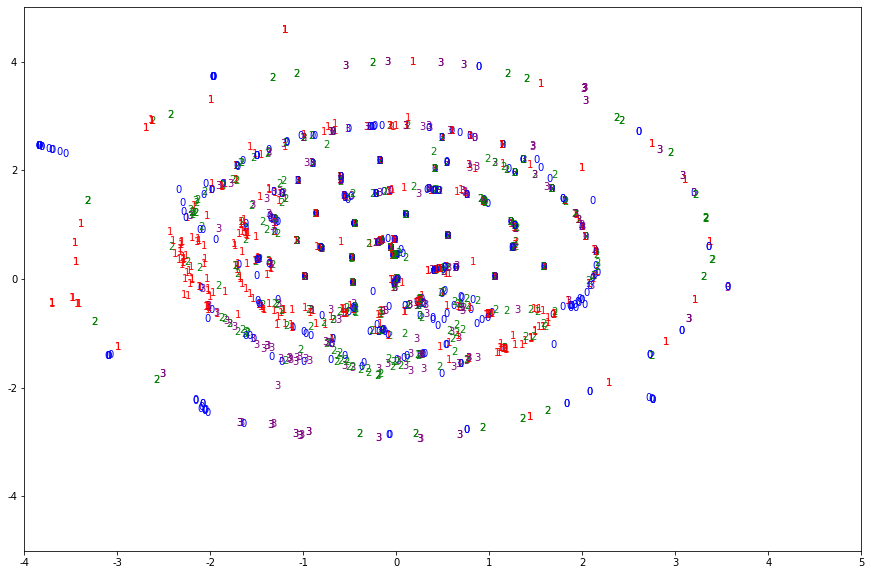

In [32]:
tsne_graph(tsne_tf, y_train, (-4, 5, -5, 5))

In [33]:
tsne = TSNE(n_components=2, init='random', random_state=7)
tsne_lsa = tsne.fit_transform(X_train_lsa)
print(tsne_lsa.shape)

(2034, 2)


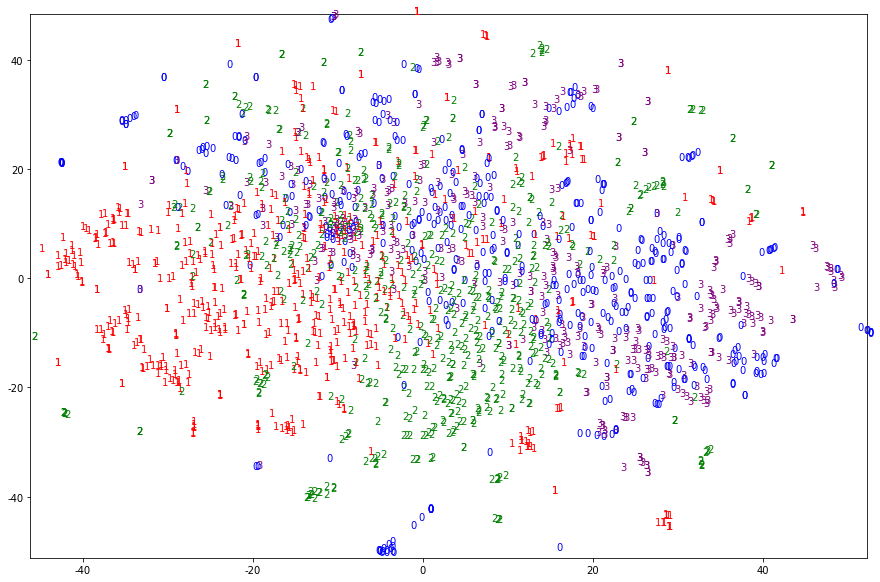

In [35]:
tsne_graph(tsne_lsa, y_train)